## Importing modules

In [1]:
%matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt


ModuleNotFoundError: No module named 'physics'

In [2]:
# working_dir = pathlib.Path().absolute()
working_dir = '/home/nbachand/Documents/Cascade/city_block'

probes = post_tools.Probes(f'{working_dir}/CHARLES/probes/probesOut')
probes.get_locations(f'{working_dir}/CHA\RLES/probes/locations')


In [21]:
LES_params = {
    'uStar': 1,
    'z0': 1
}
physics_setup = phys_tools.LES_Physics(LES_params)

AttributeError: 'LES_Physics' object has no attribute 'LES_params'

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 183 seconds
memorizing data took 60 seconds
plotting took 432 seconds


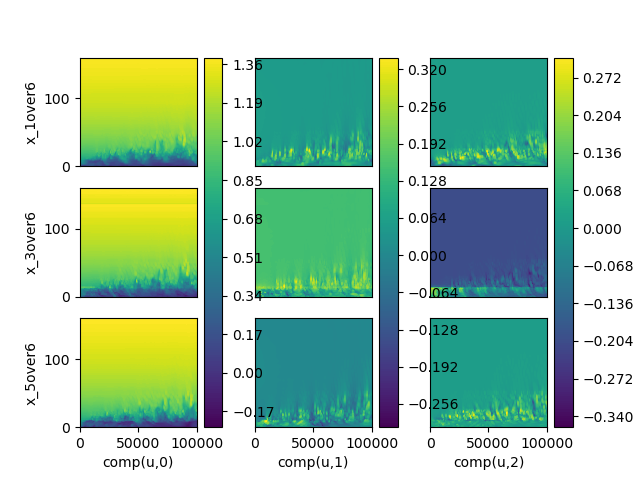

In [12]:

slice_params = {
    # 'names' : ['x_1over6','x_3over6','x_5over6'], 
    # 'steps' : probes.probe_steps[0:100],
    # 'vars' : ['comp(u,0)', 'comp(u,1)', 'comp(u,2)'],
    'parallel' : True
}

plot_params = {
    # 'processing' : [tools.mean_convergence],
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,200),
        # 'comp(u,1)' : np.linspace(0,4,200)
    }
}

# slice = probes.slice_into_df(slice_params)
probes.contour_plots(slice_params, plot_params)


In [20]:
plt.savefig(f'{working_dir}/CHARLES/probes/plots/velocity_contour')

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 209 seconds
memorizing data took 57 seconds
processing data took 25 seconds
plotting took 394 seconds


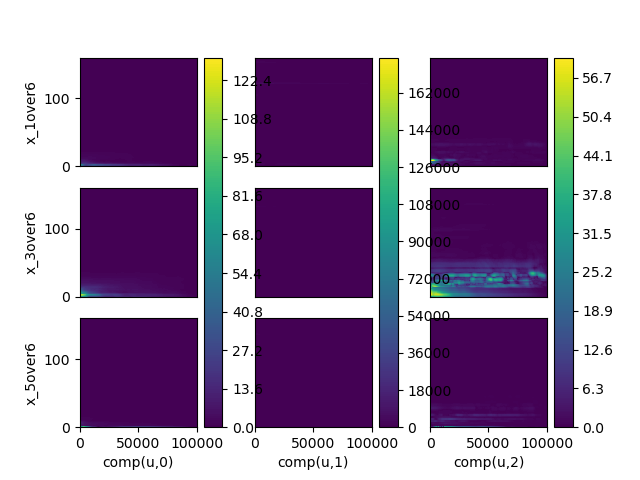

In [4]:

slice_params = {
    # 'names' : ['x_1over6','x_3over6','x_5over6'], 
    # 'steps' : probes.probe_steps[0:1000],
    # 'vars' : ['comp(u,0)', 'comp(u,1)', 'comp(u,2)'],
    'parallel' : True
}

plot_params = {
    'processing' : [tools.mean_convergence],
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,200),
        # 'comp(u,1)' : np.linspace(0,4,200)
    }
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(slice_params, plot_params)